In [1]:
import librosa
import numpy as np
import seaborn as sns
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [10]:
SR = 48000
NFFT = 1022
HOP = 64
SIG_LIM = 2 ** 15 - HOP

In [11]:
signal, _ = librosa.load("dataset/gtr/gtr_08.wav", mono=True, sr=SR)
signal = signal[:SIG_LIM]
print(signal.shape)
ipd.Audio(signal, rate=SR)

(32704,)


In [12]:
stft = librosa.stft(signal, n_fft=NFFT, hop_length=HOP)
print(stft.shape)
print(stft[:-1].shape)
istft = librosa.istft(stft[:-1], n_fft=NFFT, hop_length=HOP)
print(istft.shape)
ipd.Audio(istft, rate=SR)

(512, 512)
(511, 512)
(32704,)


In [5]:
magnitude = np.abs(stft[:-1])
print(magnitude.shape)
phase = np.angle(stft[:-1])
print(phase.shape)
print(f"Magnitude: {np.min(magnitude)}, {np.max(magnitude)}")
print(f"Phase: {np.min(phase)}, {np.max(phase)}")

(512, 512)
(512, 512)
Magnitude: 1.3614429690278484e-06, 72.0572738647461
Phase: -3.141592502593994, 3.141592502593994


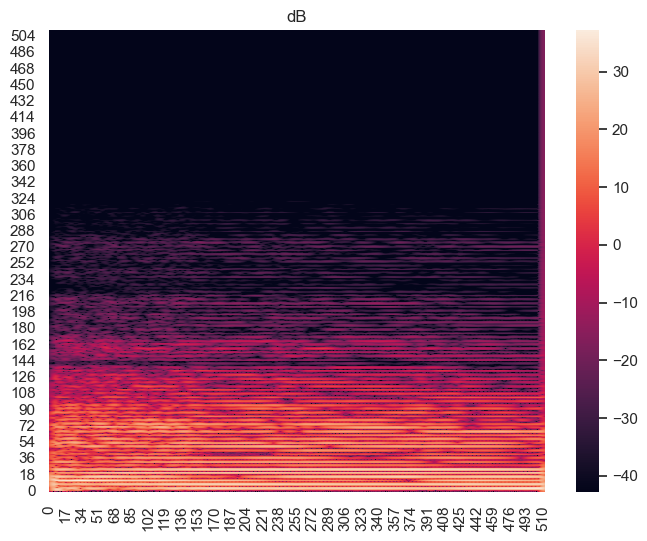

In [6]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(librosa.amplitude_to_db(magnitude))
ax.invert_yaxis()
plt.title("dB")
plt.show()

In [7]:
restored_stft = magnitude * np.exp(1j * phase)
restored_audio = librosa.istft(restored_stft, n_fft=NFFT, hop_length=HOP)
print(restored_audio.shape, np.min(restored_audio), np.max(restored_audio))
ipd.Audio(restored_audio, rate=SR)

(32704,) -0.52520746 0.5620424


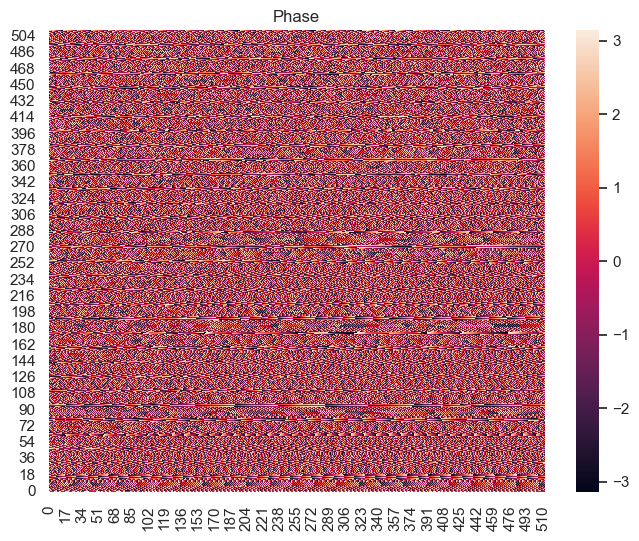

In [8]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
ax = sns.heatmap(phase)
ax.invert_yaxis()
plt.title("Phase")
plt.show()